In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv(r'predictive_maintenance (1).csv')
data

,Unnamed: 0,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,3926,3927,L51106,L,302.6,311.5,1609,36.0,162,0,No Failure
1,5433,5434,L52613,L,302.9,312.5,1550,45.5,72,0,No Failure
2,9989,9990,M24849,M,298.8,308.5,1577,33.2,0,0,No Failure
3,341,342,M15201,M,297.4,308.2,1530,32.6,22,0,No Failure
4,9495,9496,H38909,H,299.3,310.0,1373,44.8,221,0,No Failure
...,...,...,...,...,...,...,...,...,...,...,...
7995,1855,1856,H31269,H,297.7,307.3,1249,62.8,47,0,No Failure
7996,6904,6905,M21764,M,300.9,311.5,1704,31.3,159,0,No Failure
7997,6142,6143,L53322,L,300.9,310.9,1755,27.9,148,0,No Failure
7998,3410,3411,L50590,L,301.2,310.3,1451,39.7,123,0,No Failure


#1. Prepocessing the Data

In [ ]:
print(data.columns[data.isna().any()].tolist())
print(data.isna().sum())

[]
Unnamed: 0                 0
UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Target                     0
Failure Type               0
dtype: int64


Melakukan pengecekan terhadap data kosong. Hasil yang diperoleh yaitu tidak ada data yang kosong sehingga tahapan berikutnya dapat dilakukan.  

In [5]:
data = data.drop(['Unnamed: 0', 'UDI', 'Product ID', 'Failure Type', 'Target'], axis=1)

Menghapus kolom data nominal (UDI, Product ID) karena tidak dibutuhkan dalam melakukan proses clustering. Kemudian juga menghapus kolom 'Failure Type' dan 'Target' karena akan dijadikan sebagai variabel target yang juga tidak dibutuhkan dalam proses clustering.

In [7]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
one_hot = pd.get_dummies(data.iloc[:, 0])
data = data.join(one_hot)
data = data.drop(['Type'], axis=1)

Mengolah data kategorikal menjadi numerik dengan one hot encoding.

#2. Choose Features


In [9]:
data

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],H,L,M
0,302.6,311.5,1609,36.0,162,0,1,0
1,302.9,312.5,1550,45.5,72,0,1,0
2,298.8,308.5,1577,33.2,0,0,0,1
3,297.4,308.2,1530,32.6,22,0,0,1
4,299.3,310.0,1373,44.8,221,1,0,0
...,...,...,...,...,...,...,...,...
7995,297.7,307.3,1249,62.8,47,1,0,0
7996,300.9,311.5,1704,31.3,159,0,0,1
7997,300.9,310.9,1755,27.9,148,0,1,0
7998,301.2,310.3,1451,39.7,123,0,1,0


Akan dilakukan peninjauan korelasi dari setiap kolom data dengan variabel target.

In [11]:
data_new = pd.read_csv('predictive_maintenance (1).csv')
data_new = data_new.drop(['Unnamed: 0', 'UDI', 'Product ID', 'Failure Type'], axis=1)
one_hot = pd.get_dummies(data_new.iloc[:, 0])
data_new = data_new.join(one_hot)
data_new = data_new.drop(['Type'], axis=1)
data_new.corr(numeric_only=True)['Target']

Air temperature [K]        0.071359
Process temperature [K]    0.028507
Rotational speed [rpm]    -0.047288
Torque [Nm]                0.196492
Tool wear [min]            0.111525
Target                     1.000000
H                         -0.024663
L                          0.037743
M                         -0.024250
Name: Target, dtype: float64

Dari hasil di atas dapat dilihat bahwa nilai koefisien korelasi tertinggi ada di kolom 'Air Temperature', 'Torque', dan 'Tool Wear' maka akan digunakan 3 kolom ini dalam proses clustering. 

#3. K-Means Clustering


In [13]:
data = data[['Air temperature [K]', 'Torque [Nm]', 'Tool wear [min]']]
data

,Air temperature [K],Torque [Nm],Tool wear [min]
0,302.6,36.0,162
1,302.9,45.5,72
2,298.8,33.2,0
3,297.4,32.6,22
4,299.3,44.8,221
...,...,...,...
7995,297.7,62.8,47
7996,300.9,31.3,159
7997,300.9,27.9,148
7998,301.2,39.7,123


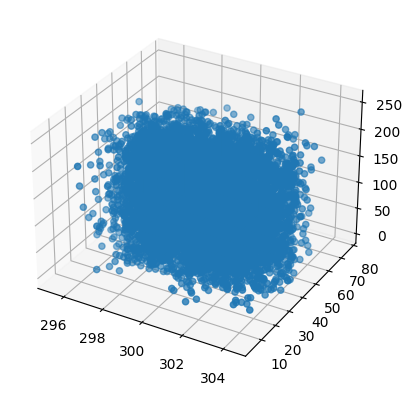

In [18]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(data['Air temperature [K]'],data['Torque [Nm]'],data['Tool wear [min]'], marker='o')

In [30]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=2)
model.fit(data)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2)

In [31]:
model.cluster_centers_

array([[299.986425,  40.059475,  53.16875 ],
       [300.023175,  39.792925, 163.57925 ]])

In [32]:
model.labels_

array([1, 0, 0, ..., 1, 1, 0], dtype=int32)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

Text(0, 0.5, 'SSE')

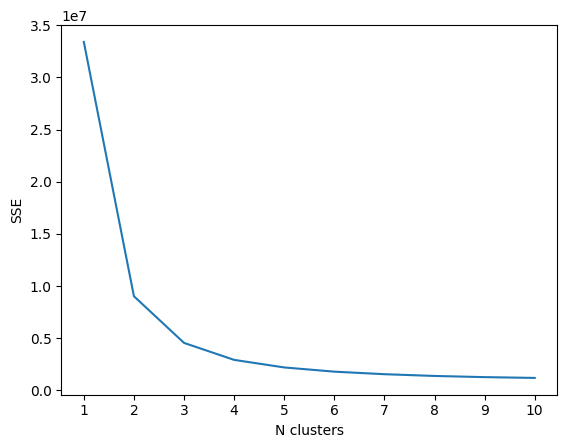

In [28]:
from sklearn.cluster import KMeans
sse = []
lin=range(1, 11)
for K in lin:
    model = KMeans(n_clusters=K)
    model.fit(data)
    sse.append(model.inertia_)

plt.plot(lin,sse)
plt.xticks(range(1, 11))
plt.xlabel('N clusters')
plt.ylabel('SSE')

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

Text(0, 0.5, 'Silhouette Coeffs')

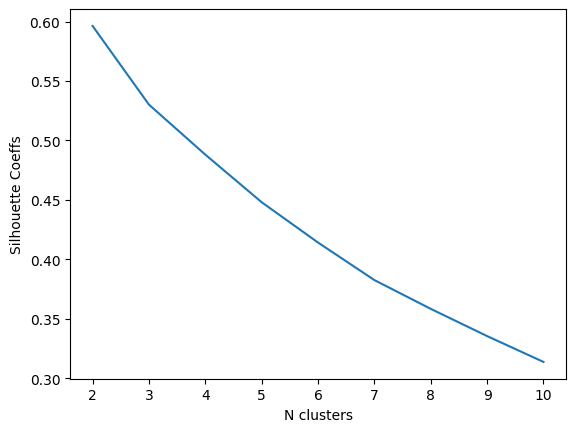

In [29]:
from sklearn.metrics import silhouette_score
silhouette_coefficients = []

for K in range(2, 11):
    model = KMeans(n_clusters=K)
    model.fit(data)
    score = silhouette_score(data, model.labels_)
    silhouette_coefficients.append(score)
    
plt.plot(range(2, 11),silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel('N clusters')
plt.ylabel('Silhouette Coeffs')

#4. The Best Number of Clusters

Ada 2 pertimbangan dalam memilih cluster ini, yaitu
1. Metode Elbow,
berdasarkan plot SSE dapat ditentukan bahwa jumlah kluster yang terbaik adalah 2-4 kluster karena menghasilkan SSE yang cukup kecil dan tidak berkurang signifikan untuk jumlah kluster yang lebih darinya. 

2. Metode Silhoutte, 
berdasarkan plot yang dihasilkan, skor tertinggi didapatkan saat jumlah kluster adalah 2 yaitu sekitar 0.6.

Berdasarkan hal tersebut maka jumlah kluster yang sebaiknya dipilih untuk mengkategorikan data adalah 2 yaitu untuk kategori 'Failure' dan 'No Failure'. Pemilihan ini didukung oleh hasil plot SSE dan silhouette coeff. yang didapat sebelumnya.

#5. Plot Clusterization Results

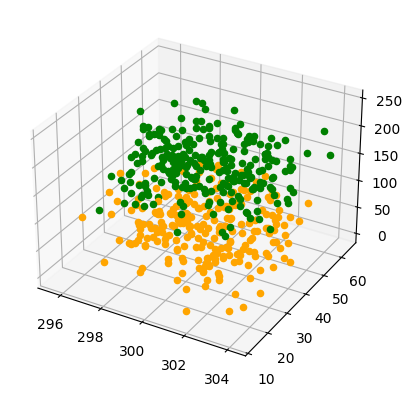

In [35]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
col = ['orange','green']
for i in range(500):
  ax.scatter(data['Air temperature [K]'][i],data['Torque [Nm]'][i],data['Tool wear [min]'][i], marker='o',c=col[model.labels_[i]])

In [38]:
T = pd.read_csv('predictive_maintenance (1).csv')['Target']

In [39]:
from sklearn.metrics import accuracy_score
accuracy_score(T, model.labels_)

0.512625

In [41]:
from sklearn.metrics import confusion_matrix
confusion_matrix(T, model.labels_)

array([[3910, 3809],
       [  90,  191]])

Berdasarkan plot hasil klusterisasi, jumlah anggota setiap kluster cukup seimbang untuk kedua warna yang diberikan. Kemudian dari prediksi untuk menghitung akurasi model clustering dalam klasifikasi didapatkan skor akurasi 0.51 yang belum cukup baik karena kurang dari setengah prediksi benar. Selanjutnya digunakan Metriks lain untuk meninjau hasil klasifikasi adalah confusion matrix, yang menunjukkan hasil clustering memiliki galat cukup besar.
Jadi, secara keseluruhan hasil klusterisasi KMeans belum cukup baik dalam memprediksi.